# 📈 Análisis de ventas

In [24]:
# 1. Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 2. Cargamos el dataset limpio
data = pd.read_csv(r"C:\Users\Borja\Desktop\Online_Sales_Analysis\data\online_sales_cleaned.csv", sep=';', decimal=',')

# 3. Mostramos las primeras filas para una vista general
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Day_of_Week,Week_Number
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,January,1,Monday,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,January,2,Tuesday,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,January,3,Wednesday,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,January,4,Thursday,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,January,5,Friday,1


## ● **Comportamiento temporal de ingresos y unidades vendidas**

### **1.** ¿Cómo han evolucionado los ingresos mes a mes durante el periodo observado?

In [26]:
# Agrupamos y sumamos los ingresos totales por cada mes
monthly_revenue = data.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_revenue

,Month,Total Revenue
0,April,12451.69
1,August,7278.11
2,February,10803.37
3,January,14548.32
4,July,6797.08
5,June,7384.55
6,March,12849.24
7,May,8455.49


In [27]:
# Lista con los meses en orden de enero a agosto
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

# Convertimos 'Month' en una categoría ordenada según month_order
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)

# Tras establecer ese orden, ordenamos los datos por mes
monthly_revenue = monthly_revenue.sort_values('Month').reset_index(drop=True)
monthly_revenue

,Month,Total Revenue
0,January,14548.32
1,February,10803.37
2,March,12849.24
3,April,12451.69
4,May,8455.49
5,June,7384.55
6,July,6797.08
7,August,7278.11


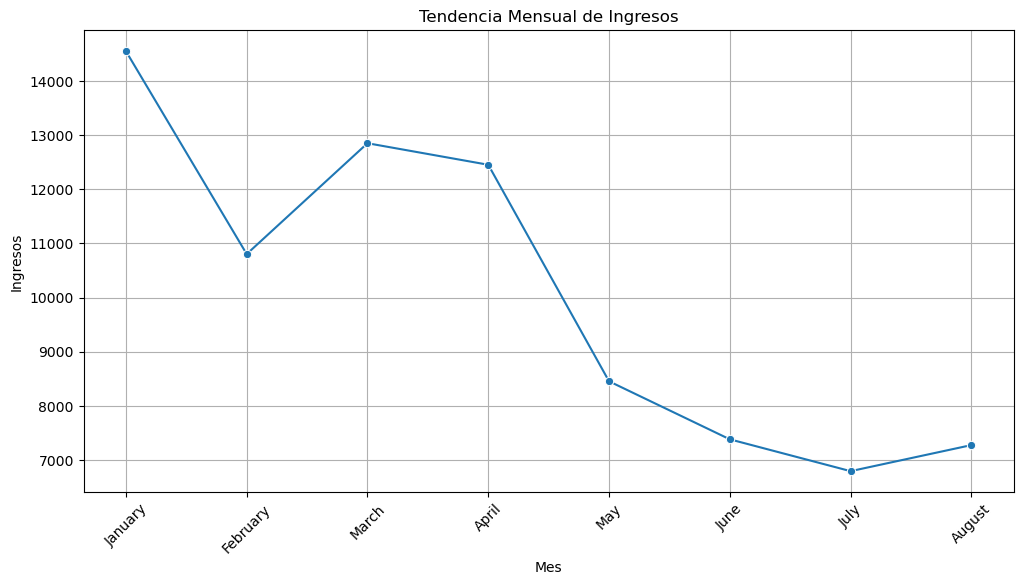

In [28]:
# Gráfico de la tendencia mensual de ingresos
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Total Revenue',marker='o')
plt.title('Tendencia Mensual de Ingresos')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

✅ **Respuesta:**



La tendencia general de las ingresos mensuales durante el periodo presenta fluctuaciones:

- **Pico máximo** se registró en **enero**.

- **Descenso** en **febrero**, seguido de un **repunte** en **marzo**.

- **Caída** sostenida de **abril a julio**.

- **Leve aumento** entre **julio y agosto**.

### **2.** ¿Qué meses tuvieron el mayor volumen de unidades vendidas?

In [29]:
# Agrupamos los datos por mes y sumamos el número de unidades vendidas en cada mes
monthly_units = data.groupby('Month')['Units Sold'].sum().reset_index()
monthly_units

,Month,Units Sold
0,April,65
1,August,52
2,February,77
3,January,68
4,July,53
5,June,61
6,March,82
7,May,60


In [30]:
# Al igual que antes, establecemos el orden según month_order para ordenarlos correctamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthly_units['Month'] = pd.Categorical(monthly_units['Month'], categories=month_order, ordered=True)

monthly_units = monthly_units.sort_values('Month').reset_index(drop=True)
monthly_units

,Month,Units Sold
0,January,68
1,February,77
2,March,82
3,April,65
4,May,60
5,June,61
6,July,53
7,August,52


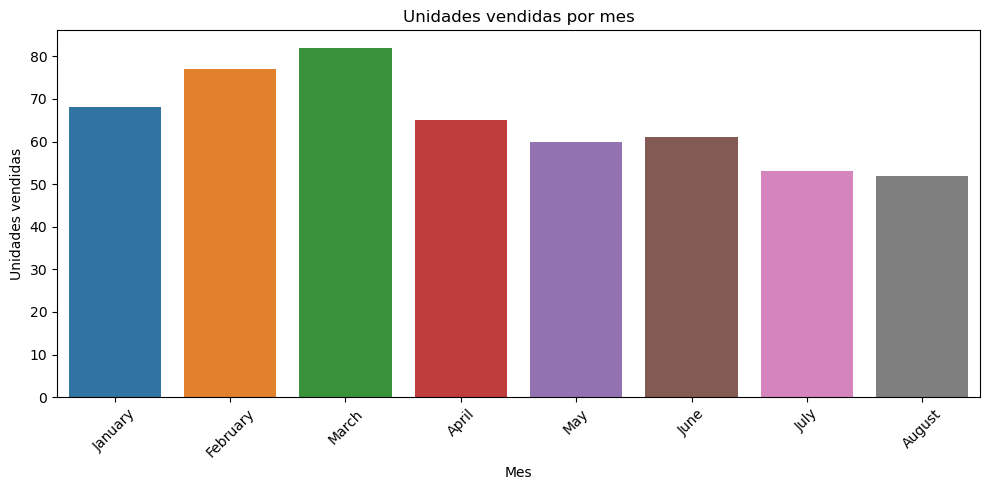

In [31]:
# Gráfico de la tendencia mensual de unidades vendidas por mes
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Units Sold', data=monthly_units, hue='Month')
plt.title("Unidades vendidas por mes")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ **Respuesta:**

Los meses con mayor volumen de unidades vendidas fueron:

- **Marzo**: 82 

- **Febrero**: 77 

- **Enero**: 68 

Los meses restantes se mantuvieron relativamente estables, con una ligera disminución gradual.

### **3.** ¿Qué semanas de cada mes registran las mayores ingresos? ¿Y unidades vendidas?

In [32]:
# Agrupamos y sumamos los ingresos totales por mes y número de semana
weekly_revenue = data.groupby(['Month','Week_Number'])[['Total Revenue','Units Sold']].sum().reset_index()
weekly_revenue['Week_Number'] = weekly_revenue.groupby('Month').cumcount() + 1

# De nuevo, establecemos el orden según month_order para ordenarlos correctamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
weekly_revenue['Month'] = pd.Categorical(weekly_revenue['Month'], categories=month_order, ordered=True)

weekly_revenue = weekly_revenue.sort_values(by = ['Month','Week_Number']).reset_index(drop=True)

# Renombramos las semanas como "Mes - S1", "Mes - S2", etc.
weekly_revenue['Week_Number'] = weekly_revenue['Month'].str[:3] + ' - S' + weekly_revenue['Week_Number'].astype(str)
weekly_revenue

,Month,Week_Number,Total Revenue,Units Sold
0,January,Jan - S1,5513.83,17
1,January,Jan - S2,4211.83,17
2,January,Jan - S3,2767.84,16
3,January,Jan - S4,1064.87,13
4,January,Jan - S5,989.95,5
5,February,Feb - S1,579.86,14
6,February,Feb - S2,5374.86,16
7,February,Feb - S3,2361.86,19
8,February,Feb - S4,1857.84,17
9,February,Feb - S5,628.95,11


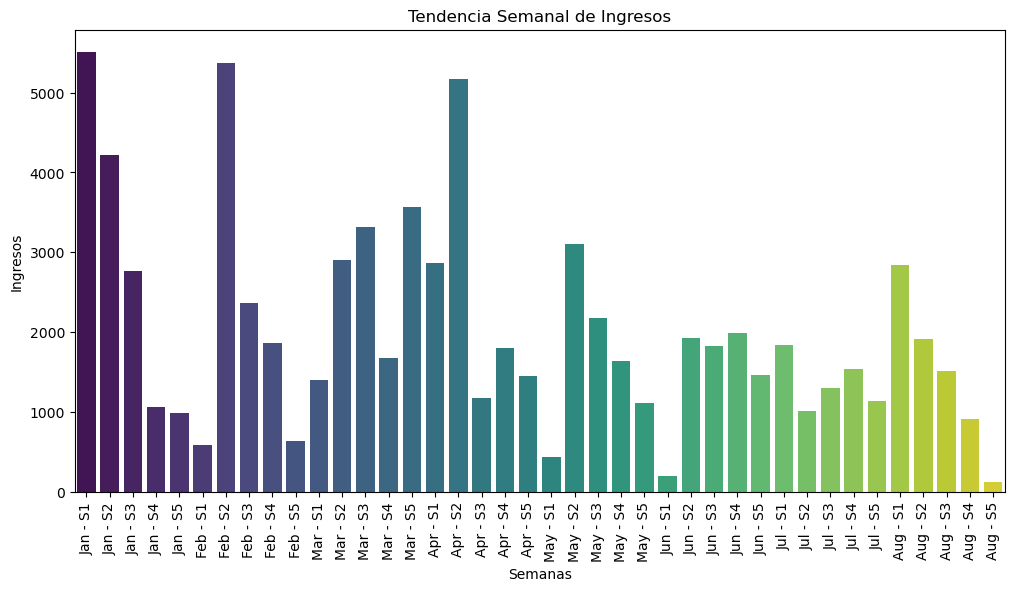

In [33]:
# Gráfico de la tendencia semanal de ingresos
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_revenue, x='Week_Number', y='Total Revenue', hue='Week_Number', palette = 'viridis')
plt.title('Tendencia Semanal de Ingresos')
plt.xlabel('Semanas')
plt.ylabel('Ingresos')
plt.xticks(rotation=90)
plt.show()

✅ **Respuesta:**

Semanas con mayores ingresos por mes:

- **Enero:** S3

- **Febrero:** S4

- **Marzo:** S1

- **Abril:** S5

- **Mayo:** S2

- **Junio:** S3

- **Julio:** S4

- **Agosto:** S1

En la mayoría de los meses, las **ventas alcanzan su punto máximo** durante las **dos primeras semanas**, excepto en junio, donde el mayor volumen de ventas se concentra en la cuarta semana. Además, durante **todo el verano**, las ventas se **mantienen relativamente estables**, probablemente debido al periodo vacacional.



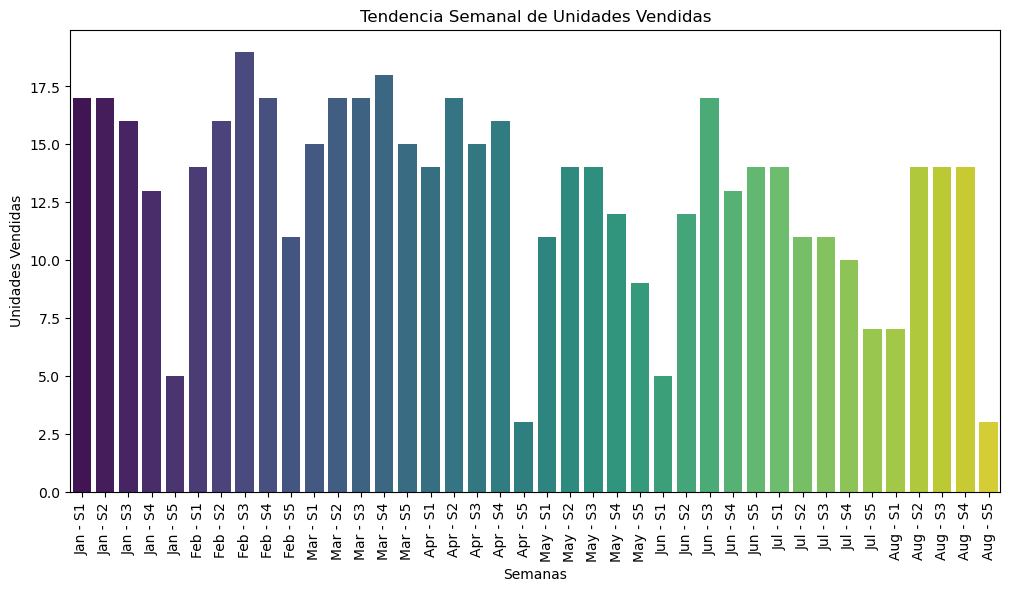

In [34]:
# Gráfico de la tendencia semanal de unidades vendidas
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_revenue, x='Week_Number', y='Units Sold', hue='Week_Number', palette = 'viridis')
plt.title('Tendencia Semanal de Unidades Vendidas')
plt.xlabel('Semanas')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=90)
plt.show()

✅ **Respuesta:**

Se observa que las **menores unidades vendidas** suelen ocurrir en la **última semana de cada mes**, salvo en junio, donde la primera semana registra el volumen más bajo. En general, **el resto de las semanas** presenta una **estabilidad** relativa en las unidades vendidas.

### **4.** ¿Qué días de la semana se obtienen más ingresos? ¿Se generan más ingresos en días laborales o fines de semana?

In [35]:
# Agrupamos y sumamos los ingresos totales por semana
daily_revenue = data.groupby(['Day_of_Week'])['Total Revenue'].sum().sort_values(ascending=False).reset_index()
daily_revenue

,Day_of_Week,Total Revenue
0,Tuesday,13518.34
1,Friday,12918.74
2,Monday,12253.35
3,Saturday,11494.02
4,Sunday,11153.30
5,Wednesday,10402.14
6,Thursday,8827.96


✅ **Respuesta:**

Los tres días de la semana con mayores ingresos son:

- **Martes:** 13518.34 

- **Viernes:** 12918.74

- **Lunes:** 12253.35


In [36]:
# Filtramos las filas correspondientes a los fines de semana (sábado y domingo) 
weekends_revenue = daily_revenue[(daily_revenue['Day_of_Week'] == 'Saturday') | (daily_revenue['Day_of_Week'] == 'Sunday')]

# Sumamos los ingresos totales de los fines de semana
total_weekends_revenue = weekends_revenue['Total Revenue'].sum()
float(total_weekends_revenue)

22647.32

In [37]:
# Filtramos las filas correspondientes a los días laborales (lunes a viernes) 
not_weekends_revenue = daily_revenue.drop(weekends_revenue.index)

# Sumamos los ingresos totales de los días laborales
total_not_weekends_revenue = not_weekends_revenue['Total Revenue'].sum()
float(total_not_weekends_revenue)

57920.53

✅ **Respuesta:**

Se **generan más ingresos** en los **días laborales** con un total de **57920,53**, en comparación con los **fines de semana** que suman **22647,32**.
Esto muestra que la mayoría de las compras se realizan durante la semana laboral, probablemente por hábitos de consumo relacionados con el trabajo y las actividades cotidianas.

### **5.** ¿Cómo varían los ingresos mensualmente a lo largo del periodo para cada día de la semana?

In [38]:
# Agrupamos y sumamos los ingresos totales por mes y día de la semana
weekly_day_revenue = data.groupby(['Day_of_Week','Month'])['Total Revenue'].sum().reset_index()
weekly_day_revenue

,Day_of_Week,Month,Total Revenue
0,Friday,April,5209.94
1,Friday,August,986.98
2,Friday,February,526.87
3,Friday,January,1869.93
4,Friday,July,829.89
5,Friday,June,311.42
6,Friday,March,1953.86
7,Friday,May,1229.85
8,Monday,April,608.88
9,Monday,August,614.95


In [39]:
# Lista con los meses y días de la semana en orden
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

# Convertimos 'Month' y 'Day_of_Week' en categorías ordenadas según month_order y or
weekly_day_revenue['Day_of_Week'] = pd.Categorical(weekly_day_revenue['Day_of_Week'], categories=days_order, ordered=True)
weekly_day_revenue['Month'] = pd.Categorical(weekly_day_revenue['Month'], categories=month_order, ordered=True)

# Tras establecer esos órdenes, ordenamos los datos por día de la semana y mes
weekly_day_revenue = weekly_day_revenue.sort_values(by=['Day_of_Week','Month']).reset_index(drop=True)
weekly_day_revenue

,Day_of_Week,Month,Total Revenue
0,Monday,January,3775.91
1,Monday,February,3544.91
2,Monday,March,463.92
3,Monday,April,608.88
4,Monday,May,827.91
5,Monday,June,928.95
6,Monday,July,1487.92
7,Monday,August,614.95
8,Tuesday,January,1457.87
9,Tuesday,February,1948.93


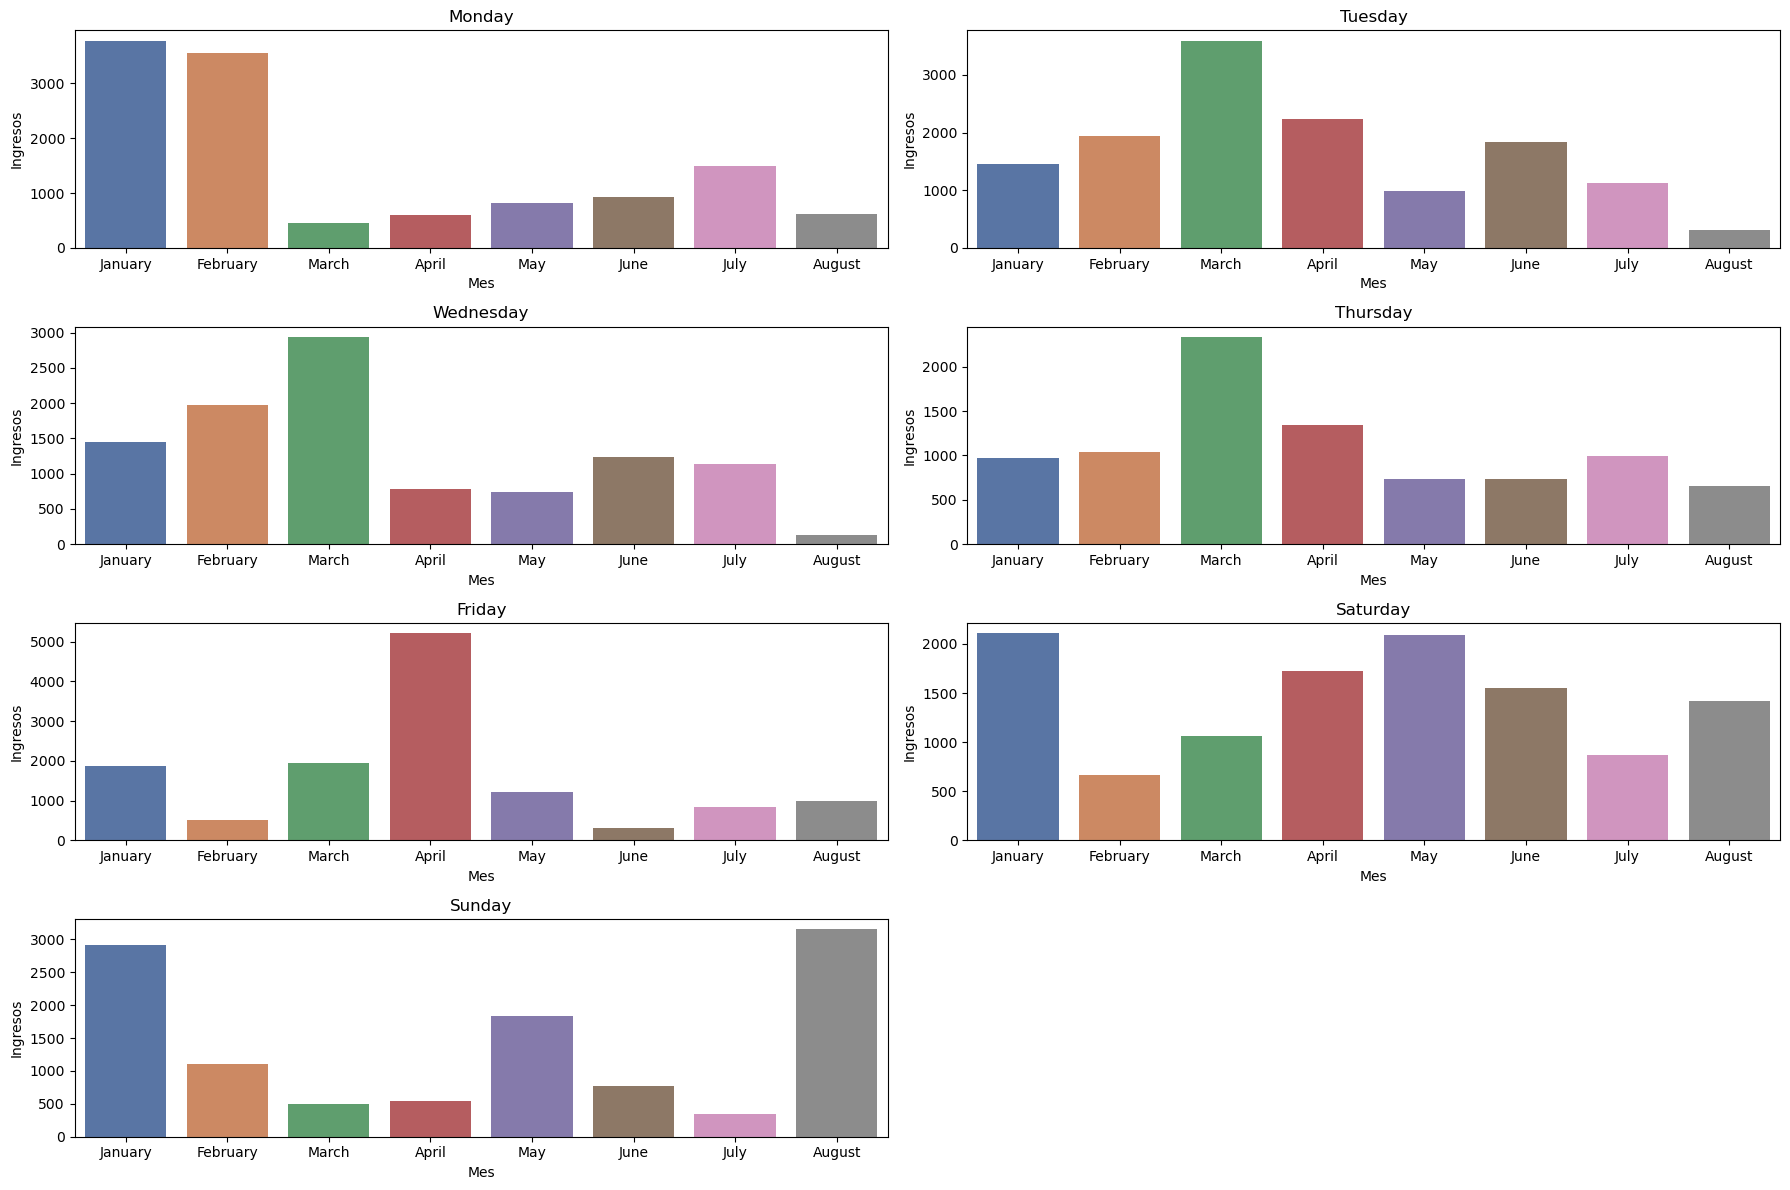

In [40]:
# Gráficos de los ingresos totales por mes para cada día de la semana
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for i, day in enumerate(days_order):
    ax = axes[i]
    day_data = weekly_day_revenue[weekly_day_revenue['Day_of_Week'] == day]
    sns.barplot(data=day_data, x='Month', y='Total Revenue', hue ='Month', palette='deep', ax=ax)
    ax.set_title(day)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ingresos')

fig.delaxes(axes[-1])
plt.tight_layout()

✅ **Respuesta:**

- **Lunes:** Las ingresos se **concentran** principalmente en **enero y febrero**, siendo notablemente bajas en el resto de los meses.

- **Martes, miércoles y jueves:** Siguen un patrón similar, con un aumento desde enero hasta un **pico en marzo**, seguido de una disminución gradual.

- **Viernes:** Presentan un comportamiento fluctuante, con descensos y ascensos alternados, siendo **abril** el mes con el **mayor volumen de ingresos**.

- **Sábados:** Comienzan con un **alto volumen de ingresos en enero**, experimentan una caída drástica en febrero, para luego recuperarse y mantenerse en niveles moderados.

- **Domingos:** Inician con **ingresos elevados** que disminuyen gradualmente mes a mes hasta un **repunte en agosto**.

## ● **Comportamiento de ventas según la región**

### **6.** ¿Cómo han evolucionado los ingresos en cada región a lo largo del tiempo?

In [41]:
# Agrupamos y sumamos los ingresos totales (ventas) en cada mes y región
monthly_region_revenue = data.groupby(['Month','Region'])['Total Revenue'].sum().reset_index()
monthly_region_revenue

,Month,Region,Total Revenue
0,April,Asia,3329.60
1,April,Europe,2191.33
2,April,North America,6930.76
3,August,Asia,2178.62
4,August,Europe,1839.66
5,August,North America,3259.83
6,February,Asia,4278.68
7,February,Europe,3201.90
8,February,North America,3322.79
9,January,Asia,3369.67


In [42]:
# Convertimos 'Month' en categorías ordenadas según month_order
monthly_region_revenue['Month'] = pd.Categorical(monthly_region_revenue['Month'], categories=month_order, ordered=True)

# Tras establecer esos órdenes, ordenamos los datos por mes
monthly_region_revenue = monthly_region_revenue.sort_values(by=['Region','Month']).reset_index(drop=True)
monthly_region_revenue

,Month,Region,Total Revenue
0,January,Asia,3369.67
1,February,Asia,4278.68
2,March,Asia,2619.60
3,April,Asia,3329.60
4,May,Asia,1989.54
5,June,Asia,1945.38
6,July,Asia,2744.36
7,August,Asia,2178.62
8,January,Europe,2869.89
9,February,Europe,3201.90


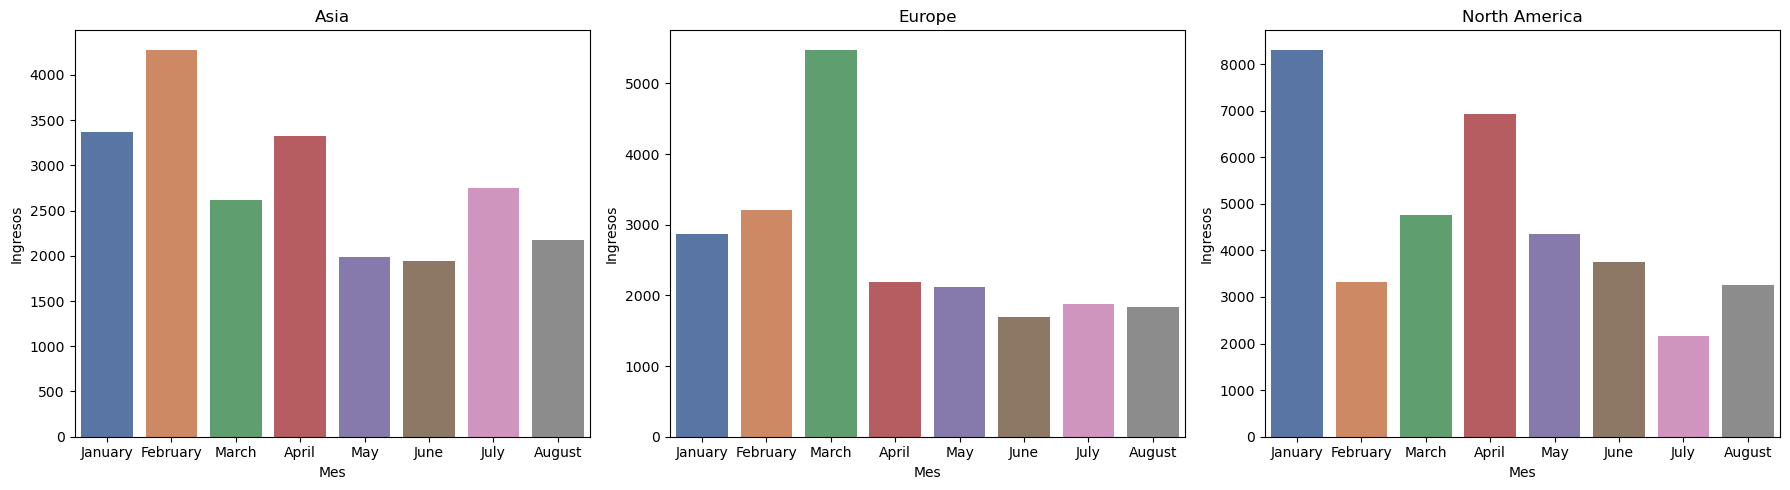

In [43]:
# Gráficos de los ingresos totales por mes para cada región
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

region_order = ['Asia', 'Europe', 'North America']
for i, region in enumerate(region_order):
    ax = axes[i]
    region_data = monthly_region_revenue[monthly_region_revenue['Region'] == region]
    sns.barplot(data=region_data, x='Month', y='Total Revenue', hue ='Month', palette='deep', ax=ax)
    ax.set_title(region)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ingresos')

plt.tight_layout()

✅ **Respuesta:**

- **Asia:**  Los ingresos **alcanzan un máximo en febrero**, y a partir de ahí tienden a **disminuir gradualmente**.

- **Europa:** Se observa un **incremento notable en marzo**, seguido de una **caída rápida** durante los meses restantes.

- **North America:** Comienzan con los **ingresos más altos en enero**, caen significativamente, se **recuperan gradualmente hasta abril** y luego vuelven a descender.

### **7.** ¿Cuál es la distribución de ingresos por región?

In [44]:
# Agrupamos y sumamos ingresos totales por región
revenue_by_region = data.groupby(["Region"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()
revenue_by_region['Percentage'] = ((revenue_by_region['Total Revenue'] / revenue_by_region['Total Revenue'].sum()) * 100).round(2)
revenue_by_region

,Region,Total Revenue,Percentage
0,North America,36844.34,45.73
1,Asia,22455.45,27.87
2,Europe,21268.06,26.40


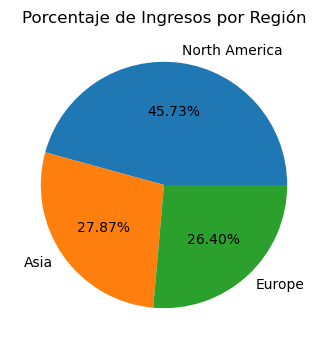

In [45]:
# Graficamos el porcentaje de ingresos por región
plt.figure(figsize=(4, 4))
plt.pie(revenue_by_region['Percentage'], labels = revenue_by_region['Region'],autopct='%1.2f%%')
plt.title('Porcentaje de Ingresos por Región')
plt.show()

✅ **Respuesta:**

- **Norteamérica** aporta la mayor parte de los ingresos, con un **45.73%** del total.

- **Asia** representa el **27.87%** de los ingresos.

- **Europa:** contribuye con un **26.40%**.

### **8.** ¿Cómo varía el ticket promedio según la región?

In [46]:
# Calculamos el promedio de ingresos por región
ticket_medio = data.groupby('Region')['Total Revenue'].mean().reset_index().sort_values(by='Total Revenue', ascending=False).round(2)
ticket_medio.columns = ['Region','Ticket Medio']
ticket_medio

,Region,Ticket Medio
2,North America,460.55
0,Asia,280.69
1,Europe,265.85


✅ **Respuesta:**

- **Norteamérica:** 460.55

- **Asia:** 280.69

- **Europa:** 265.85

Esto indica que las transacciones en Norteamérica suelen tener un valor promedio más alto.